In [1]:
import nltk
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#delete unnecessary columns
df=df.drop(['Unnamed: 2','Unnamed: 3',"Unnamed: 4"],axis=1)


In [5]:
#rename columns
df.columns=['labels',"data"]

In [6]:
df['labels']=df['labels'].map({"ham":0,"spam":1})


In [7]:
y=df['labels'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
#spliting data train/test
X_train, X_test, y_train, y_test = train_test_split( df['data'], y, test_size=0.33, random_state=42)

In [9]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train=tokenizer.texts_to_sequences(X_train)
sequences_test=tokenizer.texts_to_sequences(X_test)

In [10]:
#voacublary
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found {} unique tokens.".format(V))

Found 7259 unique tokens.


In [11]:
data_train=pad_sequences(sequences_train)
print("data_train shape",data_train.shape)
T=data_train.shape[1]

data_train shape (3733, 121)


In [12]:
data_test=pad_sequences(sequences_test,maxlen=T)
print("data test shape",data_test.shape)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

data test shape (1839, 121)


In [13]:
D=20
M=15
model=tf.keras.Sequential([
    Input(shape=(T,)),
    Embedding(V+1,D),
    LSTM(M,return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(1,activation='sigmoid')
])


In [14]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
     )


In [15]:
r=model.fit(
data_train,
    y_train,
    epochs=10,
    validation_data=(data_test,y_test),
    callbacks=[callback],
)

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 6s 2ms/sample - loss: 0.4809 - accuracy: 0.8543 - val_loss: 0.3173 - val_accuracy: 0.8630
Epoch 2/10
3733/3733 [==============================] - 4s 993us/sample - loss: 0.2343 - accuracy: 0.8998 - val_loss: 0.2090 - val_accuracy: 0.9456
Epoch 3/10
3733/3733 [==============================] - 4s 997us/sample - loss: 0.1182 - accuracy: 0.9877 - val_loss: 0.1154 - val_accuracy: 0.9837
Epoch 4/10
3733/3733 [==============================] - 4s 993us/sample - loss: 0.0708 - accuracy: 0.9946 - val_loss: 0.0919 - val_accuracy: 0.9848
Epoch 5/10
3733/3733 [==============================] - 4s 1ms/sample - loss: 0.0474 - accuracy: 0.9971 - val_loss: 0.0803 - val_accuracy: 0.9864
Epoch 6/10
3733/3733 [==============================] - 5s 1ms/sample - loss: 0.0334 - accuracy: 0.9981 - val_loss: 0.0759 - val_accuracy: 0.9848
Epoch 7/10
3733/3733 [==============================] - 4s 1ms/sample 

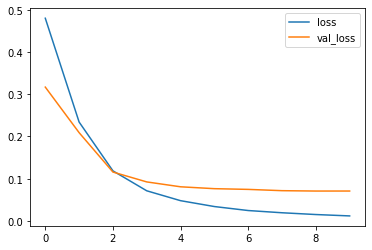

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

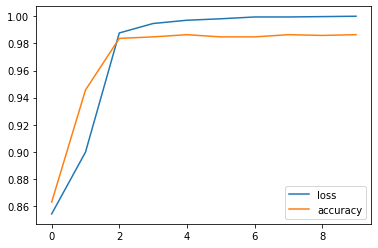

In [17]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='accuracy')
plt.legend()